TODO
- mudar o length de products que está errado - OK
- verificar as colunas de relação, que não podem ter null - ok
- Verificar os duplicados de geolocalização
- Fazer o Dataframe principal com as relações

pip:
- notebook
- pandas

# 0 - Preparando o Ambiente

## 0.1 - Download dos CSVs

Com os comandos:
- **curl**: conseguimos baixar o .zip do Kaggle e salvar na pasta brazilian_ecommerce;
- **rm**: caso exista uma pasta com o nome brazilian_ecommerce, apaga ela para não atrapalhar o projeto.
- **unzip**: extrai o .zip que foi baixado o Kaggle

In [17]:
!curl -L -o brazilian-ecommerce.zip https://www.kaggle.com/api/v1/datasets/download/olistbr/brazilian-ecommerce
!rm -rf brazilian_ecommerce
!unzip brazilian-ecommerce.zip -d brazilian_ecommerce
!rm brazilian-ecommerce.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 42.6M  100 42.6M    0     0  11.1M      0  0:00:03  0:00:03 --:--:-- 16.0M
Archive:  brazilian-ecommerce.zip
  inflating: brazilian_ecommerce/olist_customers_dataset.csv  
  inflating: brazilian_ecommerce/olist_geolocation_dataset.csv  
  inflating: brazilian_ecommerce/olist_order_items_dataset.csv  
  inflating: brazilian_ecommerce/olist_order_payments_dataset.csv  
  inflating: brazilian_ecommerce/olist_order_reviews_dataset.csv  
  inflating: brazilian_ecommerce/olist_orders_dataset.csv  
  inflating: brazilian_ecommerce/olist_products_dataset.csv  
  inflating: brazilian_ecommerce/olist_sellers_dataset.csv  
  inflating: brazilian_ecommerce/product_category_name_translation.csv  


## 0.2 - Download das bibliotecas necessárias

Usando pip para a instalação das bibliotecas necessárias no decorrer do projeto

In [16]:
!pip install pandas duckdb matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 15.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 53.1 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


# 1 - Preparação dos Dados

## 1.1 - Importações Python

Importando ibliotecas necessárias para a execução completa do notebook

In [59]:
import os
import pandas as pd
import duckdb
import matplotlib.pyplot as plt
import calendar

## 1.2 - Preparando os DataFrames com os dados dos CSVs

In [2]:
# Diretório que foi criado na etapa de preparação do ambiente 
folder = "brazilian_ecommerce"

# Lista todos os arquivos CSV na pasta
csv_files = [f for f in os.listdir(folder) if f.endswith('.csv')]
dataframe_names = []

# Carrega os DataFrames dinamicamente
for file in csv_files:
    # Remove extensão .csv
    base_name = file.replace('.csv', '')
    # Remove 'olist_', troca 'dataset' por 'df'
    df_name = base_name.replace('olist_', '').replace('dataset', 'df')
    # Lê o CSV
    complete_path = os.path.join(folder, file)
    dataframe_names.append(df_name)
    # Salva em variáveis globais, reaproveitando o nome do arquivo que foi modificado
    globals()[df_name] = pd.read_csv(complete_path)
    print(f"{df_name} loaded with {globals()[df_name].shape[0]} lines.")

sellers_df loaded with 3095 lines.
product_category_name_translation loaded with 71 lines.
orders_df loaded with 99441 lines.
order_items_df loaded with 112650 lines.
customers_df loaded with 99441 lines.
geolocation_df loaded with 1000163 lines.
order_payments_df loaded with 103886 lines.
order_reviews_df loaded with 99224 lines.
products_df loaded with 32951 lines.


## 1.3 - Analisando Dataframes

In [5]:
for df_name in dataframe_names:
    print(f"DataFrame: {df_name}")
    # display(globals()[df_name].head(3))
    print(globals()[df_name].info())
    # print(globals()[df_name].columns)

    # criando um separador entre os dados visualizados
    print()
    print('-'*49)
    print()

DataFrame: sellers_df
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
None

-------------------------------------------------

DataFrame: product_category_name_translation
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
None

-----------------------

Com o **.info()**, podemos verificar características como:
- quantidade de colunas;
- nome das colunas;
- tipo da coluna;
- também contador de dados não nulos.

Ao analisar o nome das colunas, é possível perceber que no dataframe **products_df** existem duas colunas com o nome errado:
- product_name_lenght
- product_description_lenght

Como o correto é **length**, estarei corrigindo o nome:

In [3]:
products_df.rename(columns={
    'product_name_lenght': 'product_name_length',
    'product_description_lenght': 'product_description_length'
}, inplace=True)

products_df.columns

Index(['product_id', 'product_category_name', 'product_name_length',
       'product_description_length', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

Corrigindo o nome nas colunas, passamos para o próximo passo: as informações **RangeIndex** e **Non-Null Count** dada pelo **info()**. 
Com o **RangeIndex**, observamos o número de linhas de cada coluna. Se o **Non-Null Count** não é igual, significa que alguns valores são nulos. Por isso, é necessária uma análise para saber o que pode ser nulo e o que não pode.

### 🧼 Análise de Colunas com Possíveis Valores Nulos

#### ✅ Objetivo
Identificar quais colunas de cada DataFrame **podem conter valores nulos**, com base no tipo da coluna e na função dela (chave primária, chave estrangeira ou campo informativo).

#### 📌 Regras Gerais

| Tipo de Chave        | Pode ter `null`? | Deve ser Única? |
|----------------------|------------------|------------------|
| **Chave Primária**   | ❌ Nunca          | ✅ Sim           |
| **Chave Estrangeira**| ✅ Sim (às vezes) | ❌ Não           |

#### 🔍 Análise DataFrame por DataFrame

`sellers_df`

| Coluna                  | Pode ter `null`? | Justificativa                     |
|------------------------|------------------|-----------------------------------|
| `seller_id`            | ❌ Não            | Chave primária                    |
| `seller_zip_code_prefix` | ❌ Não          | Localização obrigatória           |
| `seller_city`          | ❌ Não            | Sempre presente                   |
| `seller_state`         | ❌ Não            | Sempre presente                   |

`product_category_name_translation`

| Coluna                          | Pode ter `null`? | Justificativa                     |
|--------------------------------|------------------|-----------------------------------|
| `product_category_name`        | ❌ Não            | Chave primária                    |
| `product_category_name_english`| ❌ Não            | Tradução correspondente           |

`orders_df`

| Coluna                          | Pode ter `null`? | Justificativa                         |
|---------------------------------|------------------|---------------------------------------|
| `order_id`                      | ❌ Não            | Chave primária                        |
| `customer_id`                   | ❌ Não            | FK obrigatória                        |
| `order_status`                  | ❌ Não            | Status sempre presente                |
| `order_purchase_timestamp`      | ❌ Não            | Sempre presente                       |
| `order_approved_at`             | ✅ Sim            | Pode não ter sido aprovado ainda      |
| `order_delivered_carrier_date`  | ✅ Sim            | Pode não ter sido enviado             |
| `order_delivered_customer_date` | ✅ Sim            | Pode não ter sido entregue            |
| `order_estimated_delivery_date` | ❌ Não            | Sempre gerada                         |

`order_items_df`

| Coluna               | Pode ter `null`? | Justificativa                                    |
|----------------------|------------------|--------------------------------------------------|
| `order_id`           | ❌ Não            | Chave estrangeira                                |
| `order_item_id`      | ❌ Não            | Parte da chave primária composta                 |
| `product_id`         | ✅ Sim (raro)     | Pode haver produto não cadastrado                |
| `seller_id`          | ❌ Não            | Sempre presente                                  |
| `shipping_limit_date`| ❌ Não            | Data definida para envio                         |
| `price`              | ❌ Não            | Sempre presente                                  |
| `freight_value`      | ❌ Não            | Sempre presente                                  |

`customers_df`

| Coluna                     | Pode ter `null`? | Justificativa                  |
|----------------------------|------------------|--------------------------------|
| `customer_id`              | ❌ Não            | Chave primária                |
| `customer_unique_id`       | ❌ Não            | Sempre presente               |
| `customer_zip_code_prefix` | ❌ Não            | Localização                   |
| `customer_city`            | ❌ Não            | Sempre presente               |
| `customer_state`           | ❌ Não            | Sempre presente               |

`geolocation_df`

| Coluna                        | Pode ter `null`? | Justificativa                          |
|-------------------------------|------------------|----------------------------------------|
| `geolocation_zip_code_prefix` | ❌ Não            | Usado como referência de localização   |
| `geolocation_lat`             | ❌ Não            | Latitude                                |
| `geolocation_lng`             | ❌ Não            | Longitude                               |
| `geolocation_city`            | ❌ Não            | Sempre presente                         |
| `geolocation_state`           | ❌ Não            | Sempre presente                         |

> ⚠️ Apesar de não ter chave primária formal, essa tabela não deve conter valores nulos.

`order_payments_df`

| Coluna               | Pode ter `null`? | Justificativa              |
|----------------------|------------------|----------------------------|
| `order_id`           | ❌ Não            | Chave estrangeira         |
| `payment_sequential` | ❌ Não            | Parte da chave composta   |
| `payment_type`       | ❌ Não            | Sempre presente           |
| `payment_installments`| ❌ Não           | Sempre presente           |
| `payment_value`      | ❌ Não            | Sempre presente           |

`order_reviews_df`

| Coluna                   | Pode ter `null`? | Justificativa                               |
|---------------------------|------------------|---------------------------------------------|
| `review_id`              | ❌ Não            | Chave primária                              |
| `order_id`               | ❌ Não            | FK obrigatória                              |
| `review_score`           | ❌ Não            | Sempre presente                             |
| `review_comment_title`   | ✅ Sim            | Comentário opcional                         |
| `review_comment_message` | ✅ Sim            | Comentário opcional                         |
| `review_creation_date`   | ❌ Não            | Sempre presente                             |
| `review_answer_timestamp`| ✅ Sim            | Pode não ter sido respondido ainda          |

`products_df`

| Coluna                         | Pode ter `null`? | Justificativa                                  |
|--------------------------------|------------------|------------------------------------------------|
| `product_id`                   | ❌ Não            | Chave primária                                |
| `product_category_name`        | ✅ Sim            | Pode ser desconhecida                          |
| `product_name_length`          | ✅ Sim            | Dados ausentes para alguns produtos            |
| `product_description_length`   | ✅ Sim            | Idem acima                                     |
| `product_photos_qty`           | ✅ Sim            | Idem                                           |
| `product_weight_g`             | ✅ Sim            | Pode estar ausente                             |
| `product_length_cm`            | ✅ Sim            | Idem                                           |
| `product_height_cm`            | ✅ Sim            | Idem                                           |
| `product_width_cm`             | ✅ Sim            | Idem                                           |

Ao verificar cada coluna utilizando **info()**, confirmamos que:

`sellers_df`, `product_category_name_translation`, `order_items_df`, `customers_df`, `geolocation_df`, `order_payments_df` não possuem valores nulos.

`orders_df` possui colunas com valores nulos:

> `order_approved_at`, `order_delivered_carrier_date`, `order_delivered_customer_date`, mas essas colunas podem conter valores nulos

`orders_reviews_df` possui colunas com valores nulos:

> `review_comment_title`, `review_comment_message`, mas essas colunas podem conter valores nulos

`products_df` possui colunas com valores nulos:

> `product_category_name`, `product_name_length`, `product_description_length`, `product_photos_qty`, `product_weight_g`, `product_length_cm`, `product_height_cm`, `product_width_cm`, mas essas colunas podem conter valores nulos

Para confirmar os dados acima, o código abaixo vai remover todos os valores nulos para cada coluna (em cada DataFrame) que não pode ter valores nulos.

In [4]:
# Dicionário com colunas que não podem ter null para cada df
nao_pode_ter_null = {
    'orders_df': ['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_estimated_delivery_date'],
    'order_items_df': ['order_id', 'order_item_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value'],
    'customers_df': ['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state'],
    'geolocation_df': ['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng', 'geolocation_city', 'geolocation_state'],
    'order_payments_df': ['order_id', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value'],
    'order_reviews_df': ['review_id', 'order_id', 'review_score', 'review_creation_date'],
    'products_df': ['product_id'],
    'sellers_df': ['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state'],
    'product_category_name_translation': ['product_category_name', 'product_category_name_english']
}

# Limpeza automática
for df_name, colunas in nao_pode_ter_null.items():
    df = globals()[df_name]
    antes = df.shape[0]
    df.dropna(subset=colunas, inplace=True)
    depois = df.shape[0]
    print(f"{df_name}: {antes - depois} linhas removidas devido a valores nulos nas colunas obrigatórias.")


orders_df: 0 linhas removidas devido a valores nulos nas colunas obrigatórias.
order_items_df: 0 linhas removidas devido a valores nulos nas colunas obrigatórias.
customers_df: 0 linhas removidas devido a valores nulos nas colunas obrigatórias.
geolocation_df: 0 linhas removidas devido a valores nulos nas colunas obrigatórias.
order_payments_df: 0 linhas removidas devido a valores nulos nas colunas obrigatórias.
order_reviews_df: 0 linhas removidas devido a valores nulos nas colunas obrigatórias.
products_df: 0 linhas removidas devido a valores nulos nas colunas obrigatórias.
sellers_df: 0 linhas removidas devido a valores nulos nas colunas obrigatórias.
product_category_name_translation: 0 linhas removidas devido a valores nulos nas colunas obrigatórias.


Pela saída percebemos que nenhuma linha foi removida. Mostrando que a verificação feita em utililizando **info()** faz sentido.

## 1.4 - Modificando Tipos

Agora, precisamos resolver o problema de tipagem. Ao observar os dados utilizando **info()**, percebemos que diversas colunas estão com tipo object, principalmente datas.
Vamos verificar novamente os tipos das colunas de cada DataFrame:

In [24]:
# verificando tipos
for df_name in dataframe_names:
    print(f"Dataframe: {df_name}")
    df = globals()[df_name]
    print(df.dtypes)
    print()

Dataframe: sellers_df
seller_id                 object
seller_zip_code_prefix     int64
seller_city               object
seller_state              object
dtype: object

Dataframe: product_category_name_translation
product_category_name            object
product_category_name_english    object
dtype: object

Dataframe: orders_df
order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

Dataframe: order_items_df
order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

Dataframe: customers_df
customer_id                 object
customer_unique_id

Confirmando a diversidade de tipos, o código abaixo deixará os tipos padronizados.

Mas como não queremos perder os NaNs, a melhor abordagem é usar os tipos inteiros nulos (Int64), oferecidos pelo Pandas. Eles preservam os NaNs mesmo em colunas numéricas inteiras.

In [5]:
customers_df = customers_df.astype({
    'customer_id': 'string',
    'customer_unique_id': 'string',
    'customer_zip_code_prefix': 'string',
    'customer_city': 'string',
    'customer_state': 'string'
})

geolocation_df = geolocation_df.astype({
    'geolocation_zip_code_prefix': 'string',
    'geolocation_lat': 'float64',
    'geolocation_lng': 'float64',
    'geolocation_city': 'string',
    'geolocation_state': 'string'
})

order_items_df = order_items_df.astype({
    'order_id': 'string',
    'order_item_id': 'Int64',
    'product_id': 'string',
    'seller_id': 'string',
    'price': 'float64',
    'freight_value': 'float64'
})
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])

order_payments_df = order_payments_df.astype({
    'order_id': 'string',
    'payment_sequential': 'Int64',
    'payment_type': 'string',
    'payment_installments': 'Int64',
    'payment_value': 'float64'
})

order_reviews_df = order_reviews_df.astype({
    'review_id': 'string',
    'order_id': 'string',
    'review_score': 'Int64',
    'review_comment_title': 'string',
    'review_comment_message': 'string'
})
order_reviews_df['review_creation_date'] = pd.to_datetime(order_reviews_df['review_creation_date'])
order_reviews_df['review_answer_timestamp'] = pd.to_datetime(order_reviews_df['review_answer_timestamp'])

orders_df = orders_df.astype({
    'order_id': 'string',
    'customer_id': 'string',
    'order_status': 'string'
})
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['order_approved_at'] = pd.to_datetime(orders_df['order_approved_at'])
orders_df['order_delivered_carrier_date'] = pd.to_datetime(orders_df['order_delivered_carrier_date'])
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])
orders_df['order_estimated_delivery_date'] = pd.to_datetime(orders_df['order_estimated_delivery_date'])

products_df = products_df.astype({
    'product_id': 'string',
    'product_category_name': 'string',
    'product_name_length': 'Int64',
    'product_description_length': 'Int64',
    'product_photos_qty': 'Int64',
    'product_weight_g': 'float64',
    'product_length_cm': 'float64',
    'product_height_cm': 'float64',
    'product_width_cm': 'float64'
})

sellers_df = sellers_df.astype({
    'seller_id': 'string',
    'seller_zip_code_prefix': 'string',
    'seller_city': 'string',
    'seller_state': 'string'
})

product_category_name_translation = product_category_name_translation.astype({
    'product_category_name': 'string',
    'product_category_name_english': 'string'
})


Dados como CEP foram deixados como `string` pois não fazemos cálculos matemáticos com o CEP. E se alguém tiver um cep 0001, ele se tranformaria em 1.
E dados como centímetros, etc... foram transformados em `float`.

Com o código acima executado, vamos verificar se a mudança de tipos foi realizada.

In [6]:
# verificando tipos
for df_name in dataframe_names:
    print(f"Dataframe: {df_name}")
    df = globals()[df_name]
    print(df.dtypes)
    print()

Dataframe: sellers_df
seller_id                 string[python]
seller_zip_code_prefix    string[python]
seller_city               string[python]
seller_state              string[python]
dtype: object

Dataframe: product_category_name_translation
product_category_name            string[python]
product_category_name_english    string[python]
dtype: object

Dataframe: orders_df
order_id                         string[python]
customer_id                      string[python]
order_status                     string[python]
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

Dataframe: order_items_df
order_id               string[python]
order_item_id                   Int64
product_id             string[python]
seller_id              string[python]
shipping_limit_date    datetime64[ns]
price  

Confirmamos que os tipos `object` foram removidos, deixando os tipos mais fáceis de entender e trabalhar.

## 1.5 - Resolvendo Duplicatas

In [27]:
# Verificando duplicatas

for df_name in dataframe_names:
    print(df_name)
    df = globals()[df_name]
    print("Pedidos duplicados:", df.duplicated().sum())

sellers_df
Pedidos duplicados: 0
product_category_name_translation
Pedidos duplicados: 0
orders_df
Pedidos duplicados: 0
order_items_df
Pedidos duplicados: 0
customers_df
Pedidos duplicados: 0
geolocation_df
Pedidos duplicados: 261831
order_payments_df
Pedidos duplicados: 0
order_reviews_df
Pedidos duplicados: 0
products_df
Pedidos duplicados: 0


In [28]:
# verificando quantidade de linhas
geolocation_df.shape[0]

1000163

In [29]:
# quantidade de itens duplicados
geolocation_df[geolocation_df.duplicated()]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
15,1046,-23.546081,-46.644820,sao paulo,SP
44,1046,-23.546081,-46.644820,sao paulo,SP
65,1046,-23.546081,-46.644820,sao paulo,SP
66,1009,-23.546935,-46.636588,sao paulo,SP
67,1046,-23.546081,-46.644820,sao paulo,SP
...,...,...,...,...,...
1000153,99970,-28.343273,-51.873734,ciriaco,RS
1000154,99950,-28.070493,-52.011342,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS


Como o DataFrame geolocation_df é o único com duplicatas, podemos limpar as duplicatas.
Isso só é possível pois temos o prefixo do zip code, latitude e longitude. Mesmo que várias pessoas morem na mesma casa, podemos recuperar o valor em apenas uma ocorrência.

In [7]:
geolocation_df = geolocation_df.drop_duplicates()

Com o código acima executando sem problemas, podemos verificar novamente se os dataframes possuem duplicatas.

In [8]:
for df_name in dataframe_names:
    print(df_name)
    df = globals()[df_name]
    print("Pedidos duplicados:", df.duplicated().sum())

sellers_df
Pedidos duplicados: 0
product_category_name_translation
Pedidos duplicados: 0
orders_df
Pedidos duplicados: 0
order_items_df
Pedidos duplicados: 0
customers_df
Pedidos duplicados: 0
geolocation_df
Pedidos duplicados: 0
order_payments_df
Pedidos duplicados: 0
order_reviews_df
Pedidos duplicados: 0
products_df
Pedidos duplicados: 0


## 1.6 - Modelo Relacional

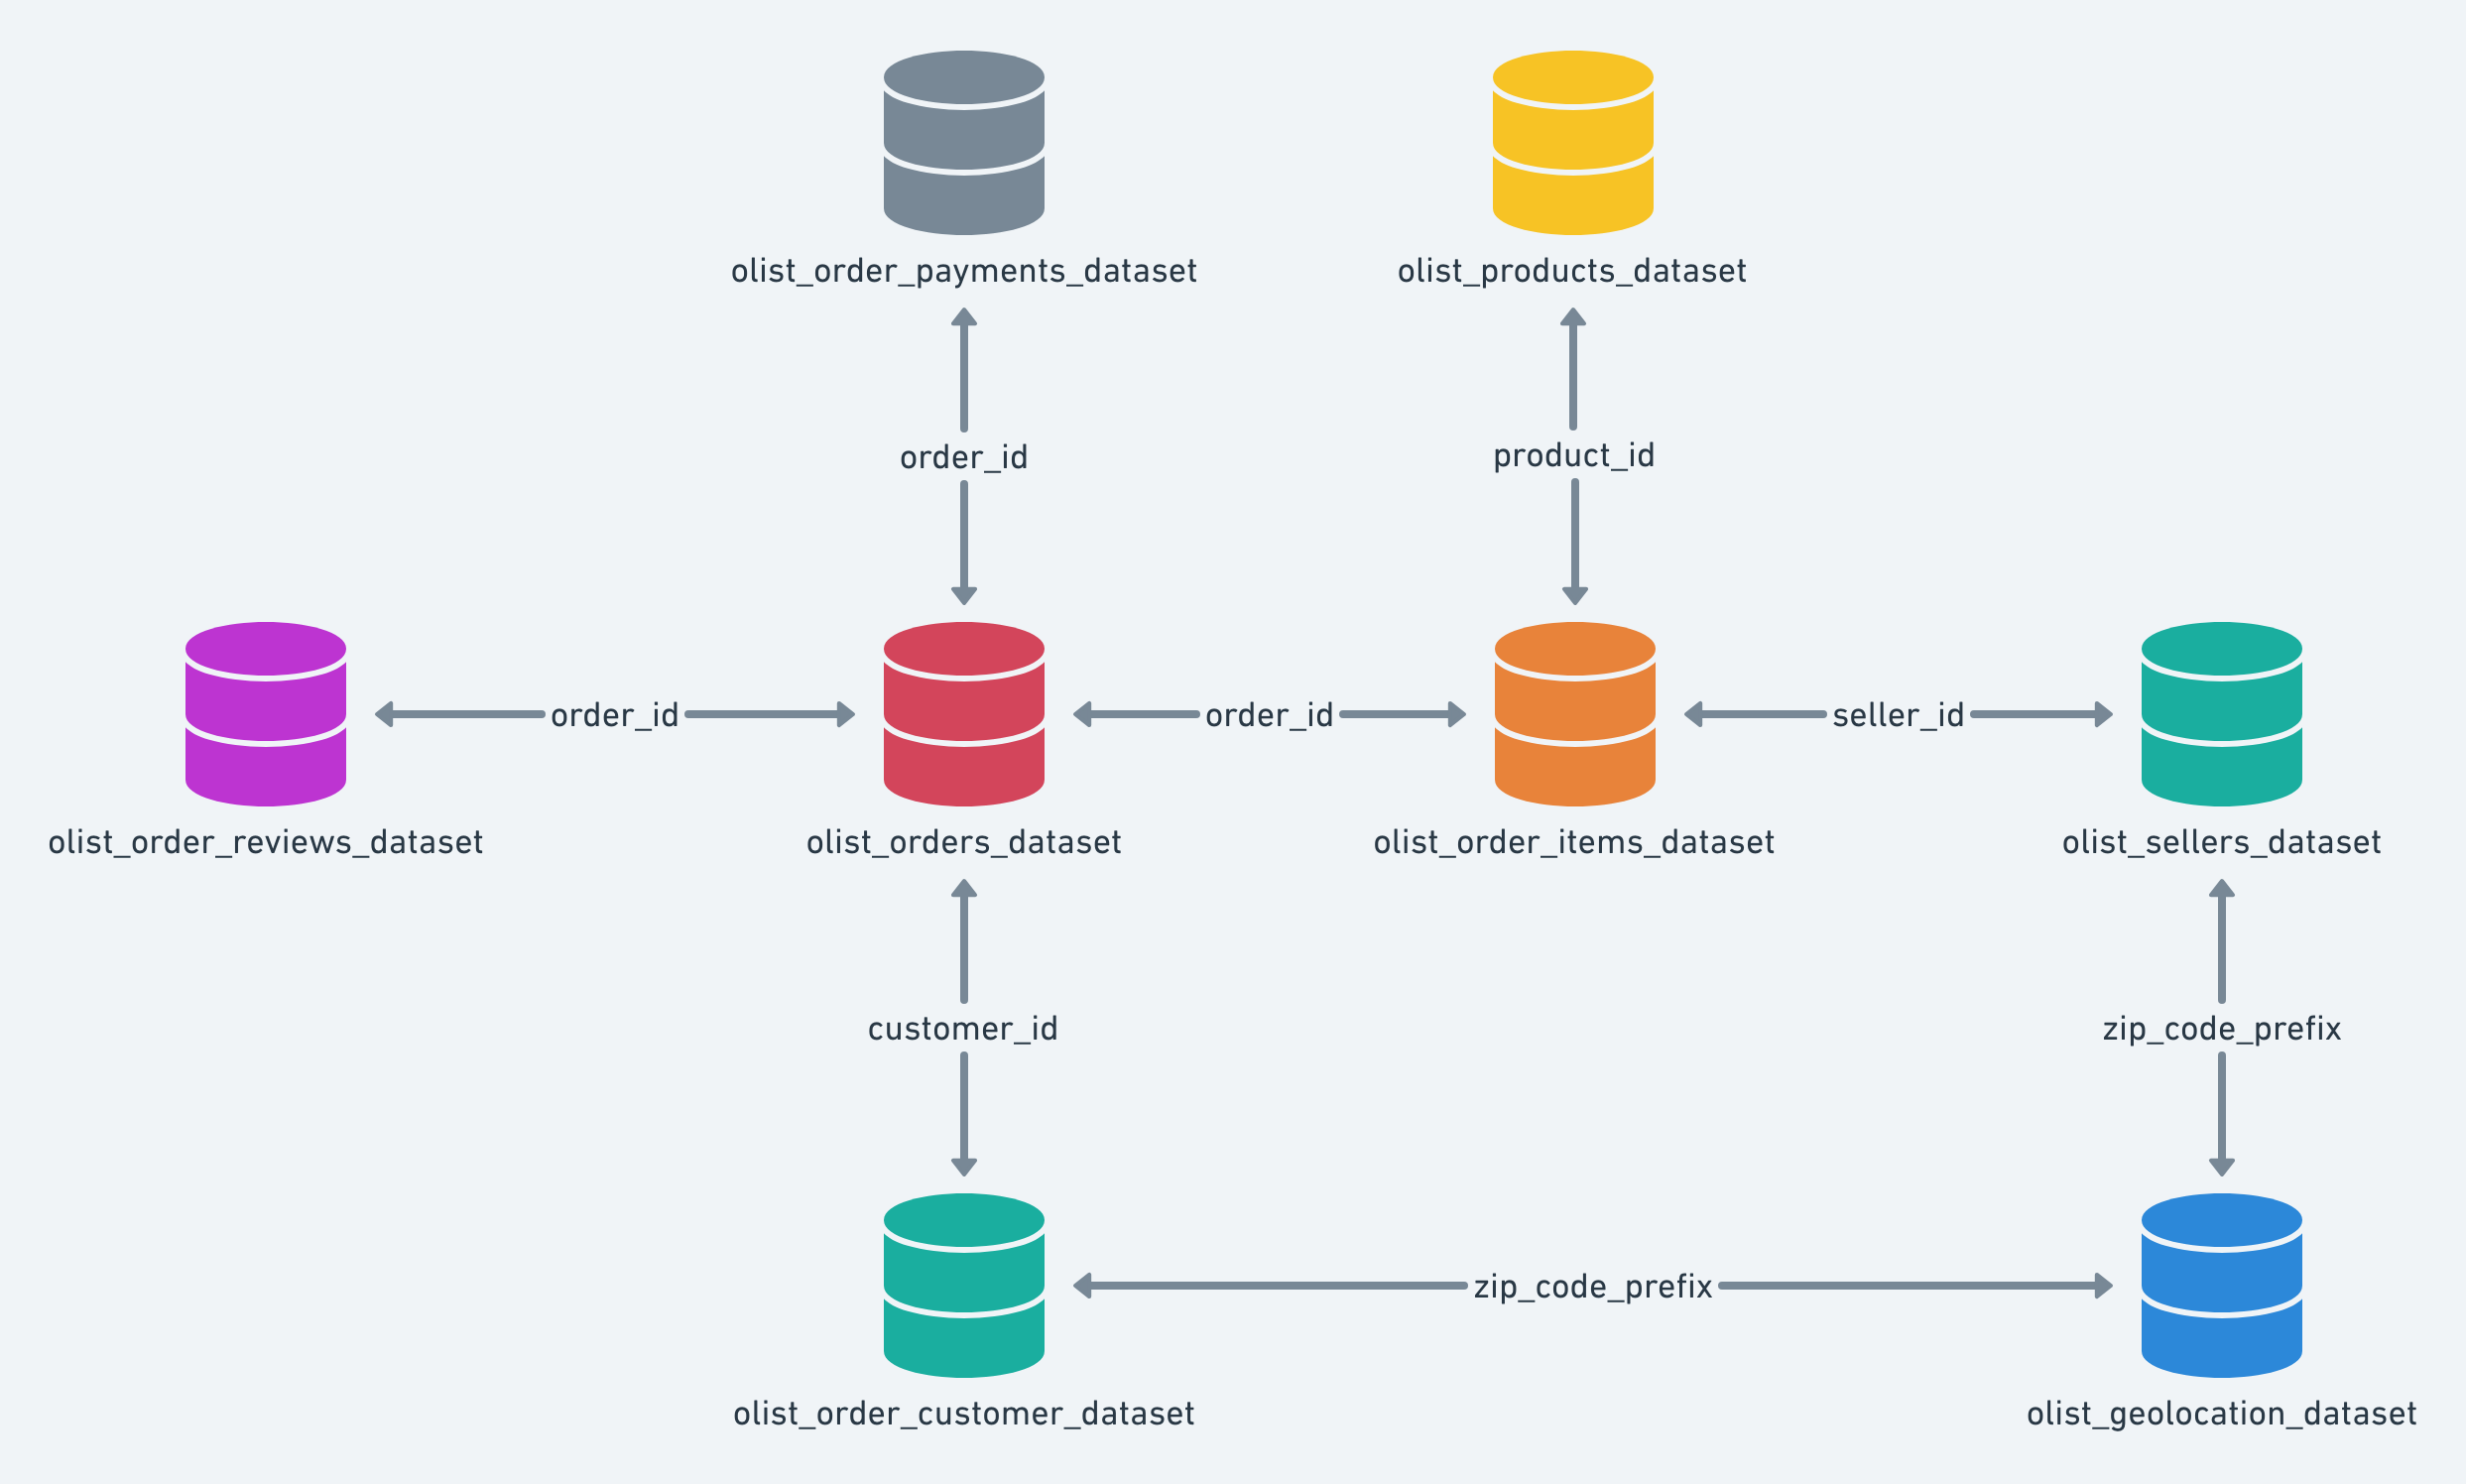

Levando em consideração a imagem original do Kaggle (mostrada acima), fiz o Modelo Relacional utilizando o site `dbdiagram.io`.

É possível verificar o Modelo Relacional, acessando o link:
https://dbdiagram.io/d/Modelo-Relacional-Olist-Ecommerce-68295e351227bdcb4ecb377a

# 2 - Análise Exploratória de Dados 

Para esta etapa, usaremos `duckdb` para facilitar as consultas SQL.

### a) Qual o volume de pedidos por mês? Existe sazonalidade nas vendas?

Para o volume de pedidos por mês (independente do ano), precisamos extrair os meses da data completa, agrupar eles e fazer uma contagem de pedidos.

In [52]:
query = """
SELECT 
  EXTRACT(MONTH FROM order_purchase_timestamp) AS mes,
  COUNT(*) AS volume_pedidos
FROM orders_df
GROUP BY mes
ORDER BY mes;
"""

In [53]:
df = con.execute(query).df()

df

,mes,volume_pedidos
0,1,8069
1,2,8508
2,3,9893
3,4,9343
4,5,10573
5,6,9412
6,7,10318
7,8,10843
8,9,4305
9,10,4959


Para a sazonalidade, mudaremos um pouco da query. Será parecida com a anterior, mas agora também é necessário fazer a extração dos anos. Depois, será feito o agrupamento baseado no mês e ano, pois precisamos saber das vendas em cada período, para tirar conclusões.

In [54]:
query = """
SELECT 
  EXTRACT(YEAR FROM order_purchase_timestamp) AS ano,
  EXTRACT(MONTH FROM order_purchase_timestamp) AS mes,
  COUNT(*) AS volume_pedidos
FROM orders_df
GROUP BY ano, mes
ORDER BY ano, mes;
"""

In [55]:
df = con.execute(query).df()

df

,ano,mes,volume_pedidos
0,2016,9,4
1,2016,10,324
2,2016,12,1
3,2017,1,800
4,2017,2,1780
5,2017,3,2682
6,2017,4,2404
7,2017,5,3700
8,2017,6,3245
9,2017,7,4026


Agora que já temos os dados de cada mês/ano, vamos tentar visualizar melhor com um gráfico de linhas comparativo por ano. Usaremos a biblioteca `matplotlib` para o gráfico e `calendar` para facilitar o entendimento dos meses.

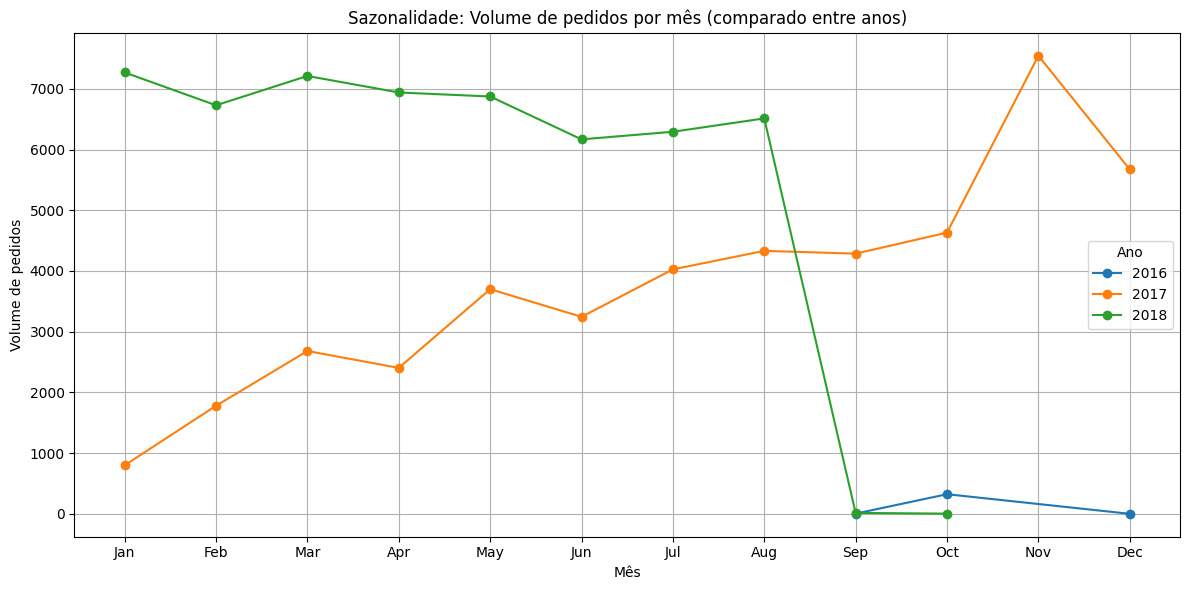

In [60]:
df['mes_nome'] = df['mes'].apply(lambda x: calendar.month_abbr[int(x)])

plt.figure(figsize=(12, 6))
for ano in sorted(df['ano'].unique()):
    dados = df[df['ano'] == ano]
    plt.plot(dados['mes'], dados['volume_pedidos'], marker='o', label=str(ano))

plt.title('Sazonalidade: Volume de pedidos por mês (comparado entre anos)')
plt.xlabel('Mês')
plt.ylabel('Volume de pedidos')
plt.xticks(ticks=range(1,13), labels=calendar.month_abbr[1:])
plt.legend(title='Ano')
plt.grid(True)
plt.tight_layout()
plt.show()

Ao analisar os dados pelo gráfico e query, percebe-se que:

- Em 2016, o volume está muito baixo e meio incompleto (apenas 4 em setembro, 324 em outubro, 1 em dezembro). O dataset da olist começou perto do fim de 2016.

- De 2017 para frente, os volumes mensais aumentam bastante, o que é esperado. Já é possível verificar que dezembro tem 5673 pedidos, novembro tem 7544 (bem alto), e o meio do ano tem volumes razoáveis.

- Em 2018, volumes altos até agosto, mas setembro e outubro mostram valores muito baixos (16 e 4 pedidos), provavelmente faltando dados, já que são os últimos do dataset original.

Parece haver um aumento grande no fim do ano (novembro, dezembro) em 2017, que pode indicar um pico sazonal relacionado a compras de fim de ano, Black Friday, Natal.

No meio do ano, os volumes parecem um pouco menores, talvez uma leve queda, mas nada tão forte.

Como 2018 está incompleto no final do ano, não dá pra confirmar se o padrão se mantém.



### b) Qual a distribuição do tempo de entrega dos pedidos?

In [63]:
query = """
SELECT 
  CAST(order_delivered_customer_date AS DATE) - CAST(order_purchase_timestamp AS DATE) AS delivery_time_days
FROM orders_df
WHERE order_delivered_customer_date IS NOT NULL
  AND order_purchase_timestamp IS NOT NULL
  AND order_delivered_customer_date >= order_purchase_timestamp;
"""

In [64]:
df = con.execute(query).df()

df

,delivery_time_days
0,8
1,14
2,9
3,14
4,3
...,...
96471,8
96472,22
96473,25
96474,17


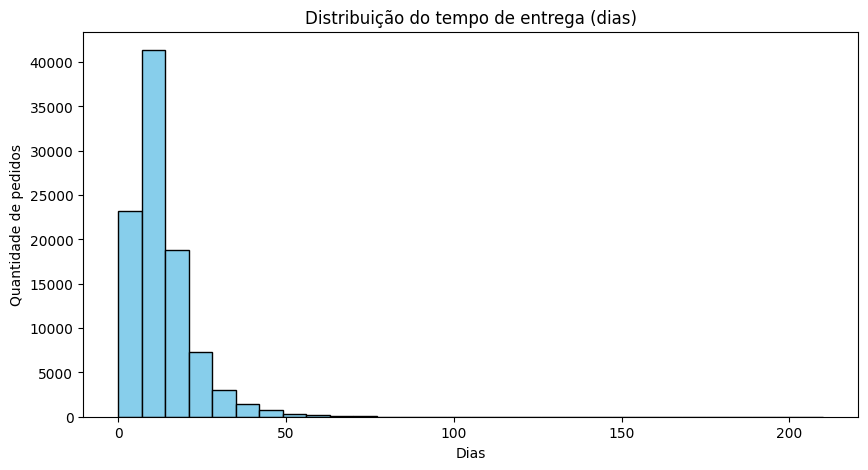

In [65]:
plt.figure(figsize=(10,5))
plt.hist(df['delivery_time_days'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribuição do tempo de entrega (dias)')
plt.xlabel('Dias')
plt.ylabel('Quantidade de pedidos')
plt.show()

In [62]:
### teste de leitura direto do csv

query = """
SELECT 
  EXTRACT(MONTH FROM order_purchase_timestamp) as mes,
  COUNT(*) as volume_pedidos
FROM 'brazilian_ecommerce/olist_orders_dataset.csv'
WHERE EXTRACT(YEAR FROM order_purchase_timestamp) = 2016
GROUP BY mes
ORDER BY mes
"""

result = duckdb.query(query).df()
print(result)

   mes  volume_pedidos
0    9               4
1   10             324
2   12               1
